# Alucar - Analisando as vendas

In [1]:
import pandas as pd 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('data/alucar.csv')

In [4]:
print(f'Quantidade de linhas e colunas : {alucar.shape} ')

Quantidade de linhas e colunas : (24, 2) 


In [5]:
print(f'Quantidade de dados nulos : {alucar.isna().sum().sum()}')

Quantidade de dados nulos : 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar.mes = pd.to_datetime(alucar.mes) # Convertendo de object para dataTime

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

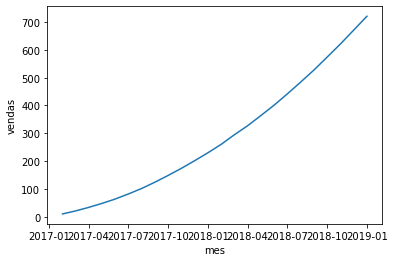

In [9]:
sns.lineplot(x='mes',y='vendas', data=alucar)

In [10]:
# Configurando o grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')

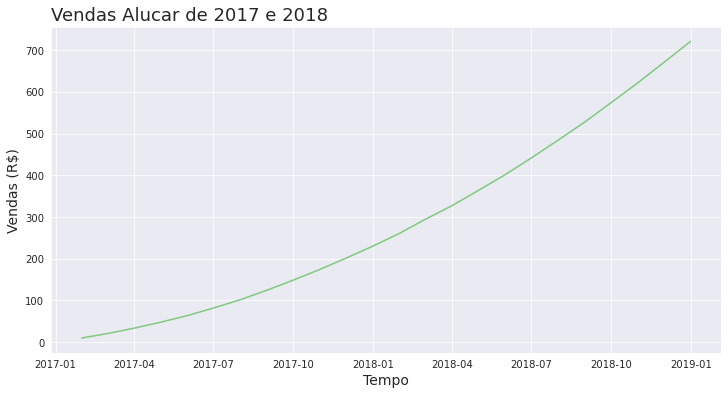

In [11]:
ax = sns.lineplot(x='mes',y='vendas', data=alucar)
# Aumentando a figura
ax.figure.set_size_inches(12,6)
# colocando um titulo
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

In [12]:
alucar['aumento'] = alucar.vendas.diff() # diff() subtrai um um por um exemplo mes 2 - mes 1 mes 3 -mes2
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


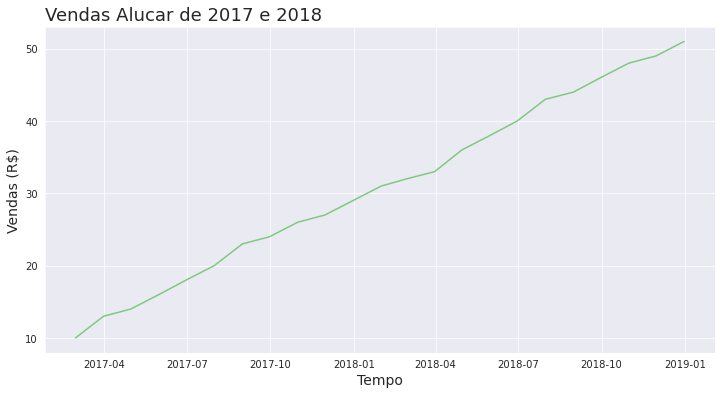

In [13]:
ax = sns.lineplot(x='mes',y='aumento', data=alucar)
# Aumentando a figura
ax.figure.set_size_inches(12,6)
# colocando um titulo
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

In [14]:
# Função para o grafico lineplot com as configurações padrao
def plotar(x,y,dataset,titulo,labelx,labely):
    '''
    x = string do x 
    y = string do y
    dataset = dataFrame
    titulo = string 
    labelx = string
    labely = string
    '''
    # Configurando o grafico
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    # Aumentando a figura
    ax.figure.set_size_inches(12,6)
    # colocando um titulo
    ax.set_title(titulo, loc='left',fontsize=18) # loc muda a direção do titulo 18 é o padrao pelo instituto styleguide
    ax.set_xlabel(labelx,fontsize = 14)
    ax.set_ylabel(labely,fontsize = 14)
 

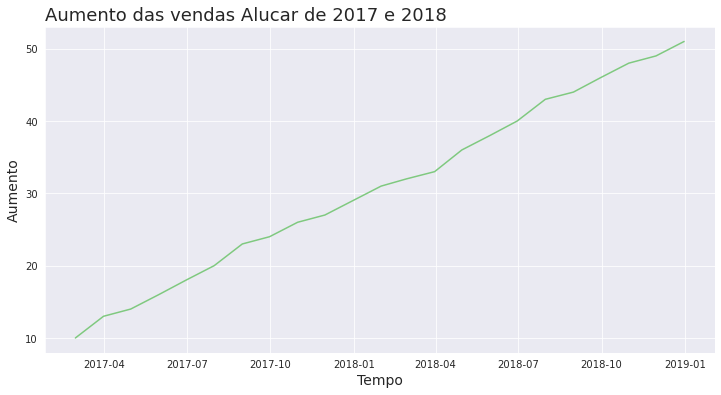

In [15]:


a = plotar('mes','aumento',alucar,'Aumento das vendas Alucar de 2017 e 2018','Tempo','Aumento')

In [16]:
help(plotar)

Help on function plotar in module __main__:

plotar(x, y, dataset, titulo, labelx, labely)
    x = string do x 
    y = string do y
    dataset = dataFrame
    titulo = string 
    labelx = string
    labely = string



In [17]:
alucar['aceleracao'] = alucar.aumento.diff()

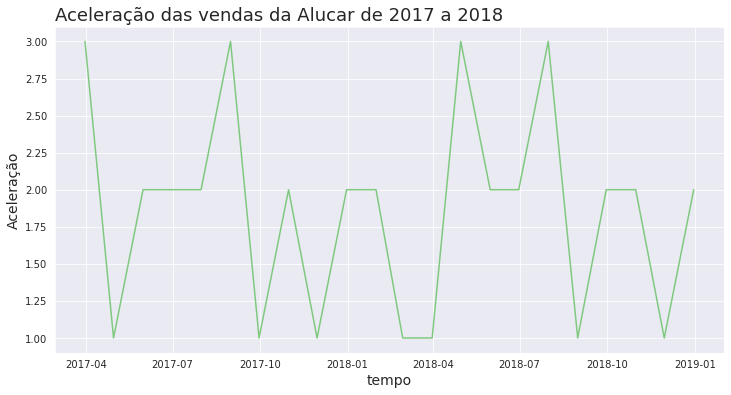

In [18]:
plotar(x='mes',y='aceleracao',dataset=alucar,titulo='Aceleração das vendas da Alucar de 2017 a 2018',labelx='tempo',labely='Aceleração')

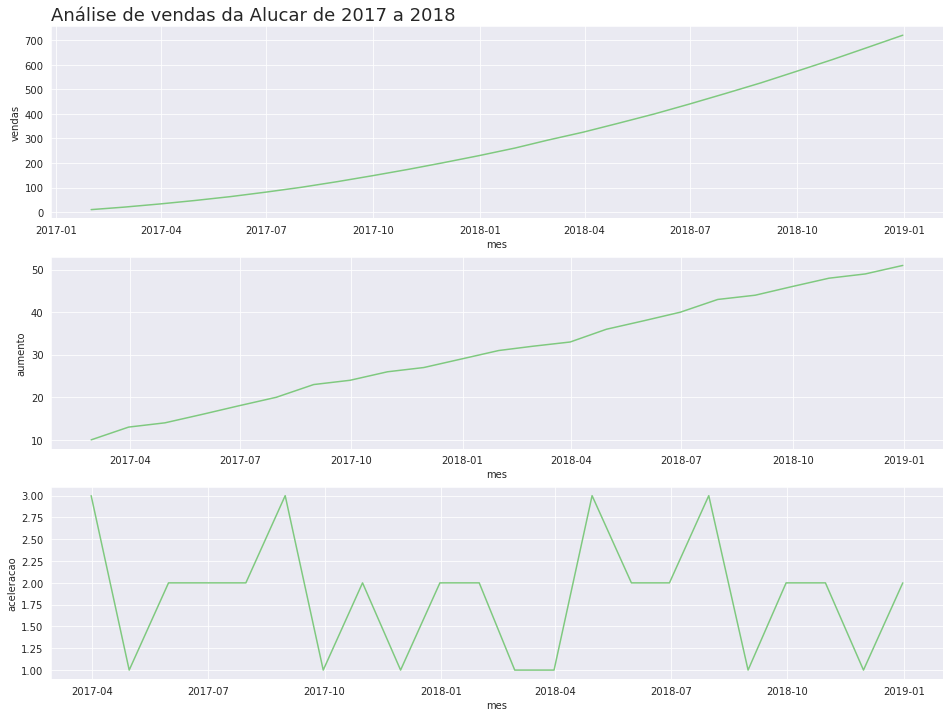

In [19]:
#juntar os graficos
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) # (linhas, colunas, posicao nas linhas)
ax.set_title('Análise de vendas da Alucar de 2017 a 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes',y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao', data=alucar)
ax = ax 

In [20]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo=''):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1) # (linhas, colunas, posicao nas linhas)
    ax.set_title(titulo, fontsize = 18, loc='left')
    sns.lineplot(x=x,y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3, data=dataset)
    ax = ax 

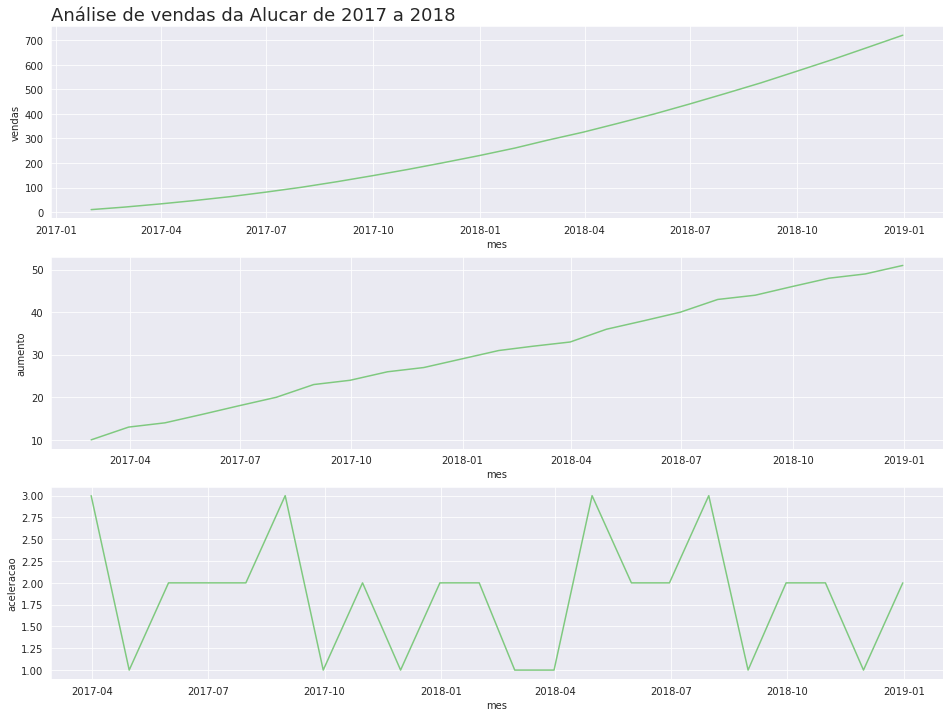

In [21]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise de vendas da Alucar de 2017 a 2018')

# Correlação

In [22]:
from pandas.plotting import autocorrelation_plot

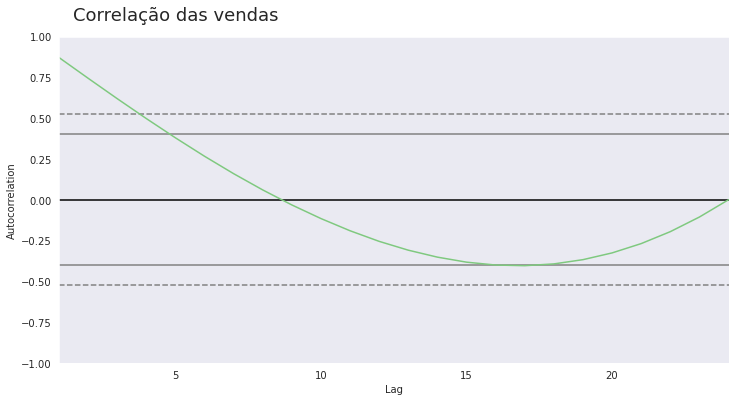

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar.vendas)


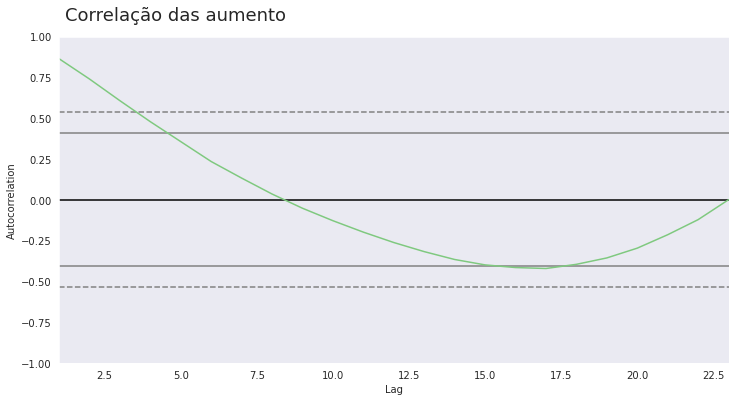

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:]) # ja que o indice 0 é nulo tem que passar pelo 1


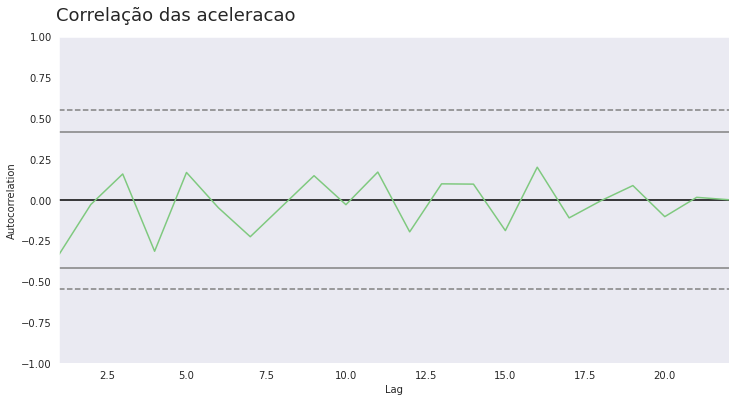

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleracao',fontsize = 18, x=0.26,y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])

# Alucar - Analisando Assinantes da newslatter

In [29]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.mes = pd.to_datetime(assinantes.mes)

In [30]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [32]:
print(f'Quantidade de linhas e colunas {assinantes.shape} \n')
print(f'Quantidade de dados nulos {assinantes.isna().sum().sum()} \n')

Quantidade de linhas e colunas (24, 2) 

Quantidade de dados nulos 0 



In [33]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [35]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [38]:
help(plot_comparacao)

Help on function plot_comparacao in module __main__:

plot_comparacao(x, y1, y2, y3, dataset, titulo='')



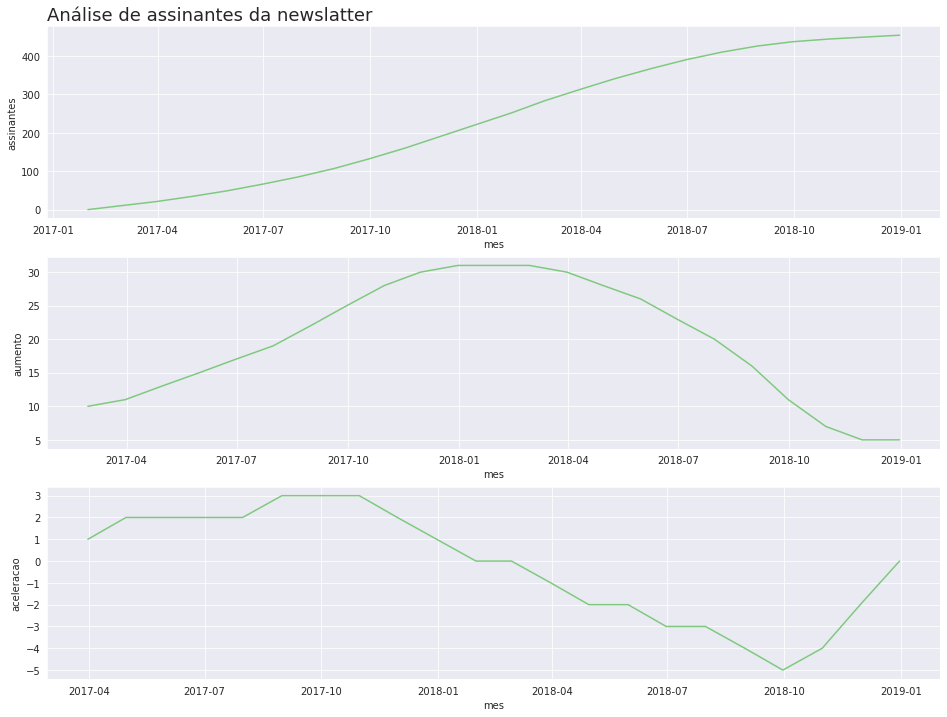

In [39]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de assinantes da newslatter ')

# Analisando as vendas da Chocolura

In [40]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [41]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [42]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [44]:
print(f'Quantidades de linhas e colunas {chocolura.shape}')
print(f'Quantidades de dados nulos {chocolura.isna().sum().sum()} ')

Quantidades de linhas e colunas (24, 2)
Quantidades de dados nulos 0 


In [45]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

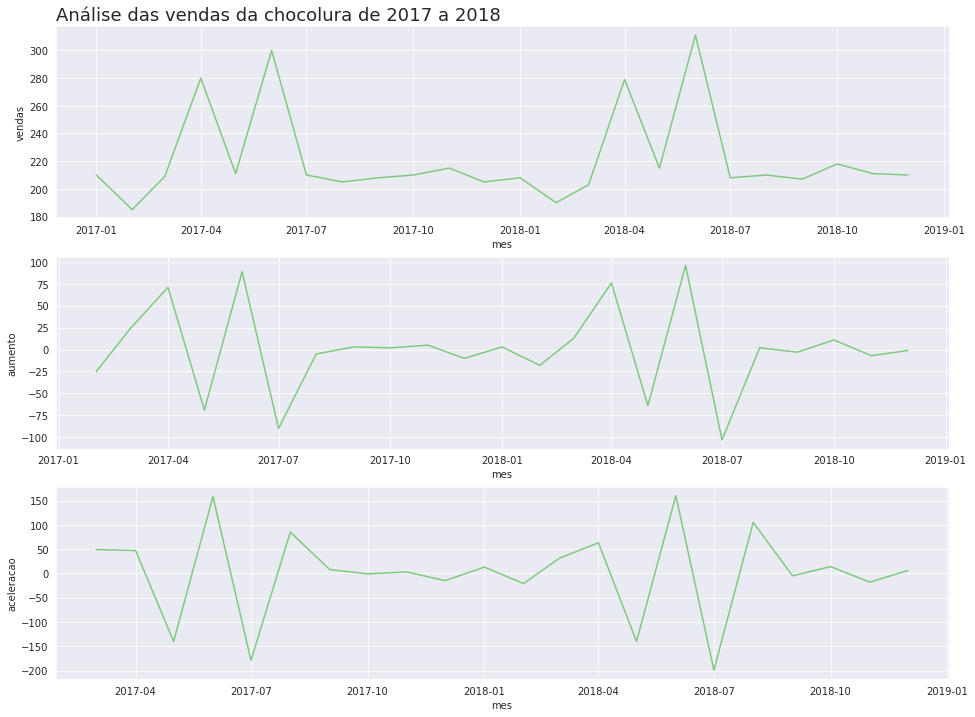

In [51]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise das vendas da chocolura de 2017 a 2018')

# Chocolura - Vendas diárias(Outubro e Novembro)

In [52]:
vendar_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendar_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [53]:
vendar_por_dia.dia = pd.to_datetime(vendar_por_dia.dia)
vendar_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [54]:
vendar_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [55]:
print(f'Quantidades de linhas e colunas {vendar_por_dia.shape}')
print(f'Quantidades de dados nulos {vendar_por_dia.isna().sum().sum()} ')

Quantidades de linhas e colunas (61, 2)
Quantidades de dados nulos 0 


In [62]:
vendar_por_dia['aumento'] = vendar_por_dia.vendas.diff()
vendar_por_dia['aceleracao'] = vendar_por_dia.aumento.diff()

In [63]:
vendar_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


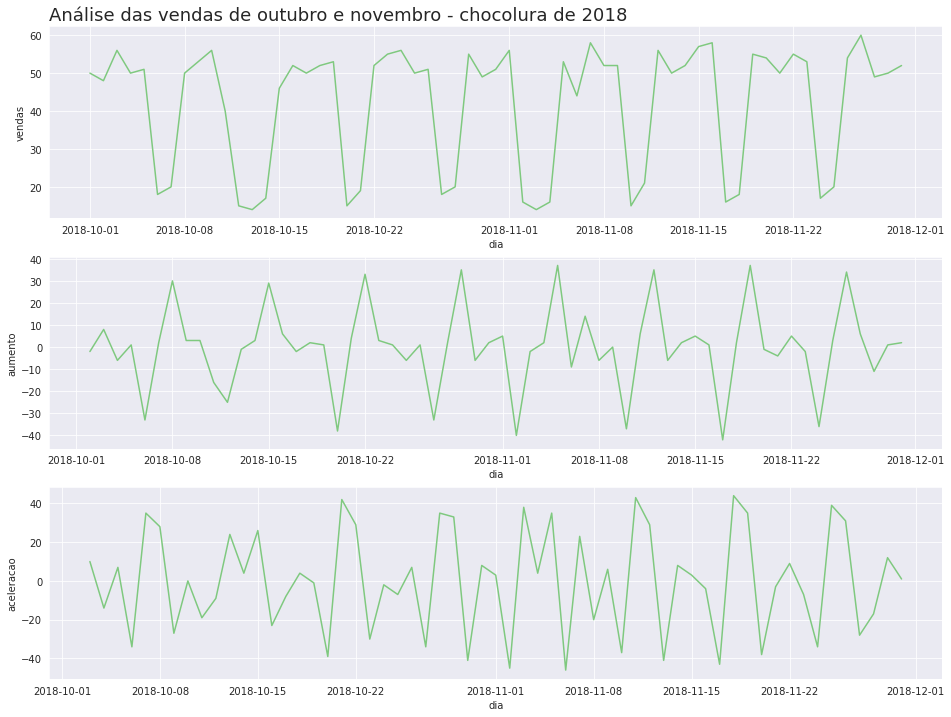

In [65]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendar_por_dia,'Análise das vendas de outubro e novembro - chocolura de 2018') 

**Analisando a sazonalidade**

In [73]:
vendar_por_dia['dia_da_semana'] = vendar_por_dia.dia.dt.day_name() # dt.day_name() coloca dia da semana 

In [74]:
vendar_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [75]:
vendar_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [77]:
dias_traduzidos = {
     'Monday':'Segunda',
     'Tuesday':'Terca',
     'Wednesday':'Quarta',
     'Thursday':'Quinta',
     'Friday':'Sexta',
     'Saturday':'Sabado',
     'Sunday':'Domingo'
}

In [78]:
vendar_por_dia.dia_da_semana = vendar_por_dia.dia_da_semana.map(dias_traduzidos)
vendar_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [79]:
vendar_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [82]:
vendas_agrupadas = vendar_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

In [83]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0
